In [1]:
import json
from os import walk
from os.path import isfile, join
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np

In [6]:
filepath = "/Users/matt/repos/thermal_state_prep/numerics/data/fixed_epsilon_harmonic/beta_env_linspaced.json"
with open(filepath) as f:
    j = json.load(f)
    inputs = j["inputs"]
    outputs = j["outputs"]
    num_samples = j["num_samples"]
    dim_sys = j["dim_sys"]
    label = j["label"]
    if len(inputs) != len(outputs):
        raise Exception("inputs and outputs are not the same length.")
    print("len of inputs: ", len(inputs))
alphas, beta_envs, epsilons, times = set(), set(), set(), set()
for (alpha, beta_env, beta_sys, time) in inputs:
    alphas.add(alpha)
    beta_envs.add(beta_env)
    epsilons.add(beta_sys)
    times.add(time)
alphas = list(alphas)
alphas.sort()
beta_envs = list(beta_envs)
beta_envs.sort()
epsilons = list(epsilons)
epsilons.sort()
times = list(times)
times.sort()

print("alphas")
print(alphas)
print("beta_envs")
print(beta_envs)
print("epsilons")
print(epsilons)
print("times")
print(times)
    

len of inputs:  40
alphas
[0.004999999999999999]
beta_envs
[0.01, 0.011937766417144363, 0.014251026703029978, 0.017012542798525893, 0.020309176209047358, 0.024244620170823284, 0.028942661247167517, 0.0345510729459222, 0.04124626382901352, 0.04923882631706739, 0.05878016072274912, 0.07017038286703829, 0.0837677640068292, 0.1, 0.1193776641714437, 0.14251026703029984, 0.17012542798525893, 0.20309176209047358, 0.24244620170823283, 0.28942661247167517, 0.345510729459222, 0.41246263829013524, 0.49238826317067413, 0.5878016072274915, 0.701703828670383, 0.837677640068292, 1.0, 1.1937766417144369, 1.4251026703029992, 1.7012542798525891, 2.030917620904737, 2.424462017082328, 2.8942661247167516, 3.4551072945922217, 4.1246263829013525, 4.923882631706742, 5.878016072274912, 7.01703828670383, 8.376776400682925, 10.0]
epsilons
[0.05]
times
[5000.0]


beta_env, beta_sys, time 0.004999999999999999 0.05 5000.0
beta_env, num_interactions =  0.01 ,  1
beta_env, num_interactions =  0.011937766417144363 ,  1
beta_env, num_interactions =  0.014251026703029978 ,  1
beta_env, num_interactions =  0.017012542798525893 ,  1
beta_env, num_interactions =  0.020309176209047358 ,  2
beta_env, num_interactions =  0.024244620170823284 ,  26
beta_env, num_interactions =  0.028942661247167517 ,  51
beta_env, num_interactions =  0.0345510729459222 ,  77
beta_env, num_interactions =  0.04124626382901352 ,  105
beta_env, num_interactions =  0.04923882631706739 ,  136
beta_env, num_interactions =  0.05878016072274912 ,  170
beta_env, num_interactions =  0.07017038286703829 ,  206
beta_env, num_interactions =  0.0837677640068292 ,  249
beta_env, num_interactions =  0.1 ,  296
beta_env, num_interactions =  0.1193776641714437 ,  348
beta_env, num_interactions =  0.14251026703029984 ,  400
beta_env, num_interactions =  0.17012542798525893 ,  457
beta_env, num_

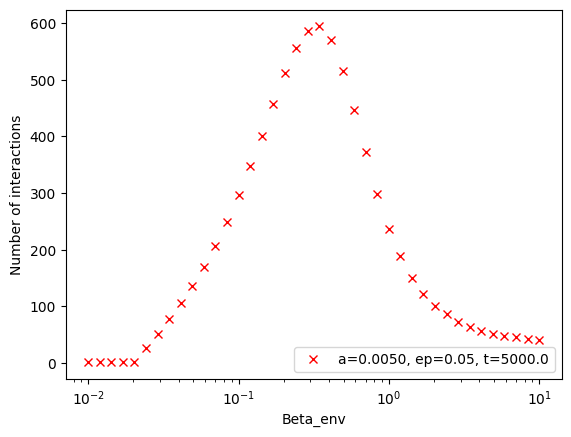

In [7]:

fixed_params = [(alphas[0], epsilons[0], times[ix]) for ix in range(len(times))]
fig = plt.figure()
colors = ['r', 'b', 'g', 'black', 'orange']
color_count = 0
for ( alpha_0, epsilon_0, time_0) in fixed_params:
    print("beta_env, beta_sys, time", alpha_0, epsilon_0, time_0)
    x = []
    y = []
    yerr = []
    for ix in range(len(inputs)):
        (alpha, beta_env, epsilon, time) = inputs[ix]
        (num_interactions, mean_dist, std_dist, dist_of_mean) = outputs[ix]
        if alpha == alpha_0 and epsilon == epsilon_0 and time == time_0:
            x.append(beta_env)
            y.append(num_interactions)

            print("beta_env, num_interactions = ", beta_env, ", ", num_interactions)
    plt.plot(x, y, marker='x', linestyle='none', label="a={:.4f}, ep={:.2f}, t={:.1f}".format(alpha_0, epsilon_0, time_0), color=colors[color_count])
    color_count += 1
plt.xscale('log')
# plt.yscale('log')
plt.xlabel("Beta_env")
plt.ylabel("Number of interactions")
plt.legend()
plt.show()

beta_env, beta_sys, time 0.004999999999999999 0.05 500.0
beta_env, num_interactions =  0.1 ,  3
beta_env, num_interactions =  0.12286253559934776 ,  5
beta_env, num_interactions =  0.15095202653901 ,  6
beta_env, num_interactions =  0.185463487344428 ,  7
beta_env, num_interactions =  0.22786514316233974 ,  9
beta_env, num_interactions =  0.2799608926363344 ,  10
beta_env, num_interactions =  0.34396705137956807 ,  12
beta_env, num_interactions =  0.4226066409512487 ,  14
beta_env, num_interactions =  0.5192252346839357 ,  17
beta_env, num_interactions =  0.6379332888043474 ,  20
beta_env, num_interactions =  0.7837810140573315 ,  23
beta_env, num_interactions =  0.9629732274171177 ,  27
beta_env, num_interactions =  1.1831333243475444 ,  30
beta_env, num_interactions =  1.4536276018142484 ,  33
beta_env, num_interactions =  1.7859637297609765 ,  36
beta_env, num_interactions =  2.1942803232690182 ,  38
beta_env, num_interactions =  2.695948443325881 ,  39
beta_env, num_interactions = 

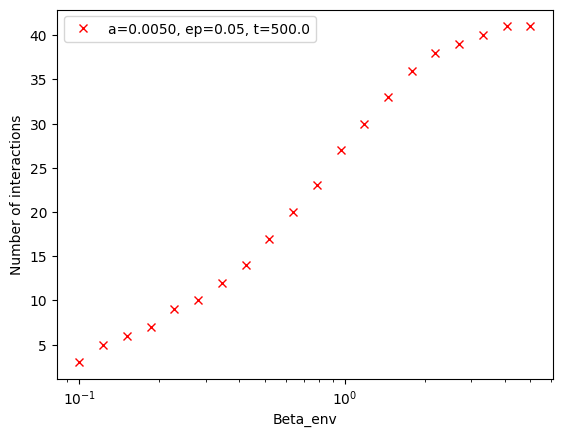

In [9]:

fixed_params = [(alphas[0], epsilons[0], times[ix]) for ix in range(len(times))]
fig = plt.figure()
colors = ['r', 'b', 'g', 'black', 'orange']
color_count = 0
for ( alpha_0, epsilon_0, time_0) in fixed_params:
    print("beta_env, beta_sys, time", alpha_0, epsilon_0, time_0)
    x = []
    y = []
    yerr = []
    for ix in range(len(inputs)):
        (alpha, beta_env, epsilon, time) = inputs[ix]
        (num_interactions, mean_dist, std_dist, dist_of_mean) = outputs[ix]
        if alpha == alpha_0 and epsilon == epsilon_0 and time == time_0:
            x.append(beta_env)
            y.append(num_interactions)

            print("beta_env, num_interactions = ", beta_env, ", ", num_interactions)
    plt.plot(x, y, marker='x', linestyle='none', label="a={:.4f}, ep={:.2f}, t={:.1f}".format(alpha_0, epsilon_0, time_0), color=colors[color_count])
    color_count += 1
plt.xscale('log')
# plt.yscale('log')
plt.xlabel("Beta_env")
plt.ylabel("Number of interactions")
plt.legend()
plt.show()

beta_env, beta_sys, time 0.01 0.05 5000.0
alpha, num_interactions =  0.004999999999999999 ,  1


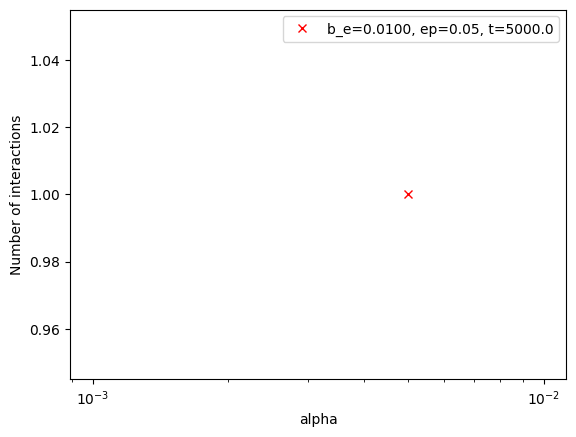

In [8]:

fixed_params = [(beta_envs[0], epsilons[0], times[0])]
fig = plt.figure()
colors = ['r', 'b', 'g', 'black', 'orange']
color_count = 0
for ( beta_env_0, epsilon_0, time_0) in fixed_params:
    print("beta_env, beta_sys, time", beta_env_0, epsilon_0, time_0)
    x = []
    y = []
    yerr = []
    for ix in range(len(inputs)):
        (alpha, beta_env, epsilon, time) = inputs[ix]
        (num_interactions, mean_dist, std_dist, dist_of_mean) = outputs[ix]
        if beta_env == beta_env_0 and epsilon == epsilon_0 and time == time_0:
            x.append(alphas[ix])
            y.append(num_interactions)

            print("alpha, num_interactions = ", alphas[ix], ", ", num_interactions)
    plt.plot(x, y, marker='x', linestyle='none', label="b_e={:.4f}, ep={:.2f}, t={:.1f}".format(beta_env_0, epsilon_0, time_0), color=colors[color_count])
    color_count += 1
plt.xscale('log')
# plt.yscale('log')
plt.xlabel("alpha")
plt.ylabel("Number of interactions")
plt.legend()
plt.show()